## Set up environment
The file `environment.yml` specifies the dependencies required to run the TRangle package. You can create a conda environment using this file:

```bash
conda env create -f environment.yml
```



## Measure angles of existing TCR structures
To measure angles in existing TCR structures, you can use the `new_calc.py` script provided in the TRangle package. This script allows you to calculate angles and distances in a TCR structure file.


```bash
python trangle/new_calc.py --input_pdb path/to/your/input.pdb
```
This will output a CSV file with the measured angles and distances.
It will also output a PDB of the extracted variable domain, was well as a visualiseation of the measured angles and distance saved as an image and a .pse file which can be opened in PyMOL.


## Measure angles of existing TCR trajectories
To measure angles in existing TCR trajectories, you can use the `new_calc_MD.py` script provided in the TRangle package. This script allows you to calculate angles and distances in a TCR trajectory file.

```bash
python trangle/new_calc_MD.py --input_traj path/to/your/input.traj --input_pdb path/to/your/input.pdb
```

## Change geometry of a TCR structure

To change the geometry of a TCR structure, you can use the `change_geometry.py` script provided in the TRangle package. This script allows you to modify angles and distances in a TCR structure based on a configuration file.

```bash
python trangle/change_geometry.py --config config.ini --input_pdb path/to/your/input.pdb
```
This script will read the configuration file, apply the specified changes to the angles and distances, and output a new PDB file with the modified geometry. It will also generate a visualization of the modified structure for inspection.


## Extract loop anchor residue coordinates
To extract the coordinates of loop anchor residues from a TCR structure, you can use the `extract_loop_anchor.py` script provided in the TRangle package. This script allows you to specify the loop anchor residues and extract their coordinates from a TCR structure file.

```bash
python trangle/extract_loop_anchor.py --input_pdb path/to/your/input.pdb --output_csv path/to/output.csv
```
This will output a CSV file containing the coordinates of the specified loop anchor residues, which can be used for input to the CDR loop diffusion model.

# Example Usage of TRangle



### Measure angles of existing TCR structures

In [12]:
import sys
import os
from pathlib import Path
path_to_project_root = os.path.abspath('..')
sys.path.append(path_to_project_root)


In [13]:
import trangle
from trangle.new_calc import run
input_pdb="2cdf.pdb"
result_angles=run(input_pdb, Path("./output"), vis=True)

[('A', 'NQVEQSPQFLSIQEGENLTVYCNSSSVFXXXXXXXSSLQWYRQEPGEGPVLLVTVVTGXXXGEVKKLXXXXXKRLTFQFGDARKDSSLHITAAQPGDTGLYLCAGADRGSTLGRLYFGRGTQLTVWPDIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKCVLDMRSMDFKSNSAVAWSNKSDFACANAFNN'), ('B', 'EADIYQTPRYLVIGTGKKITLECSQTMGHXXXXXXXDKMYWYQQDPGMELHLIHYSYGXXXXVNSTEKGDLSXSESTVSRIXRTEHFPLTLESARPSHTSQYLCASSEFRDGNEKLFFGSGTQLSVLEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFYPDHVELSWWVNGKEVHSGVCTDPQPLKEQPALNDSRYALSSRLRVSATFWQDPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRAD')]
[([((1, ' '), '-'), ((2, ' '), 'N'), ((3, ' '), 'Q'), ((4, ' '), 'V'), ((5, ' '), 'E'), ((6, ' '), 'Q'), ((7, ' '), 'S'), ((8, ' '), 'P'), ((9, ' '), 'Q'), ((10, ' '), 'F'), ((11, ' '), 'L'), ((12, ' '), 'S'), ((13, ' '), 'I'), ((14, ' '), 'Q'), ((15, ' '), 'E'), ((16, ' '), 'G'), ((17, ' '), 'E'), ((18, ' '), 'N'), ((19, ' '), 'L'), ((20, ' '), 'T'), ((21, ' '), 'V'), ((22, ' '), 'Y'), ((23, ' '), 'C'), ((24, ' '), 'N'), ((25, ' '), 'S'), ((26, ' '), 'S'), ((27, ' '), 'S'), ((28, ' '), 'V'), ((29, ' '), 'F')

  pdb_name          BA         BC1        AC1        BC2         AC2  \
0   2cdffv  125.667456  125.646685  76.255651  37.923329  162.082957   

          dc  
0  15.105783  


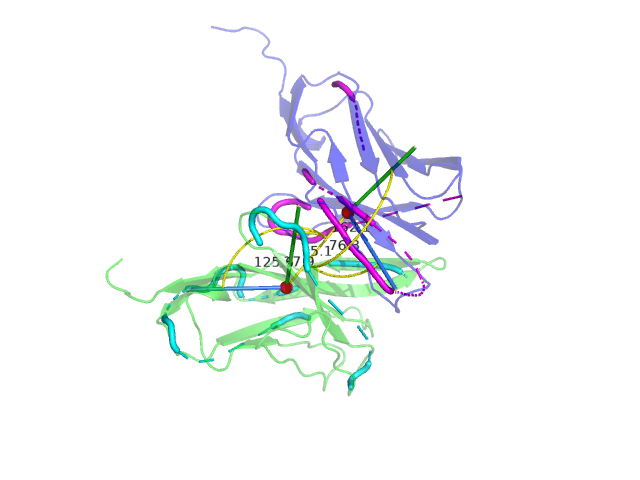

In [ ]:
print(result_angles)
#display png
from IPython.display import Image
from IPython.display import display
image_path = Path("./output/vis/vis.png")
if image_path.exists():
    display(Image(filename=image_path))


### Measure angles and distance of TCR trajectories

In [15]:
#Measure angles and distance of TCR trajectories
from trangle.new_calc_MD import run
pdb_file="A6prmtop_first_frame.pdb"
md_file="Prod_Concat_A6_CMD.xtc"
out_dir="output_MD"
run(pdb_file, md_file, out_dir)


/home/vscode/.conda/envs/Abangle/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/vscode/.conda/envs/Abangle/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[('A', 'KEVEQNSGPLSVPEGAIASLNCTYSDRGSQSFFWYRQYSGKSPELIMSIYSNGDKEDGRFTAQLNKASQYVSLLIRDSQPSDSATYLCAVTTDSWGKLQFGAGTQVVVTPDIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKCVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPE'), ('B', 'NAGVTQTPKFQVLKTGQSMTLQCAQDMNHEYMSWYRQDPGMGLRLIHYSVGAGITDQGEVPNGYNVSRSTTEDFPLRLLSAAPSQTSVYFCASRPGLAGGRPEQYFGPGTRLTVTEDLKNVFPPEVAVFEPSEAEISHTQKATLVCLATGFYPDHVELSWWVNGKEVHSGVCTDPQPLKEQPALNDSRYALSSRLRVSATFWQDPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRAD')]
[([((1, ' '), '-'), ((2, ' '), 'K'), ((3, ' '), 'E'), ((4, ' '), 'V'), ((5, ' '), 'E'), ((6, ' '), 'Q'), ((7, ' '), 'N'), ((8, ' '), 'S'), ((9, ' '), 'G'), ((10, ' '), 'P'), ((11, ' '), 'L'), ((12, ' '), 'S'), ((13, ' '), 'V'), ((14, ' '), 'P'), ((15, ' '), 'E'), ((16, ' '), 'G'), ((17, ' '), 'A'), ((18, ' '), 'I'), ((19, ' '), 'A'), ((20, ' '), 'S'), ((21, ' '), 'L'), ((22, ' '), 'N'), ((23, ' '), 'C'), ((24, ' '), 'T'), ((25, ' '), 'Y'), ((26, ' '), 'S'), ((27, ' '), 'D'), ((28, ' '), 'R'), ((29, ' '), 'G'), ((30, ' '), '-'), ((31

/home/vscode/.conda/envs/Abangle/lib/python3.9/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
/home/vscode/.conda/envs/Abangle/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:426: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the 

Processed frame 1/10000: {'BA': 113.23011739880998, 'BC1': 98.75185496562911, 'AC1': 71.58267601142208, 'BC2': 9.351548999889088, 'AC2': 154.62269293325335, 'dc': 23.97836612397746, 'frame': 0}
Processed frame 2/10000: {'BA': 111.72245378091156, 'BC1': 96.22901571902392, 'AC1': 73.45500714789772, 'BC2': 6.232629504298958, 'AC2': 153.15492645173092, 'dc': 24.55748895991858, 'frame': 1}
Processed frame 3/10000: {'BA': 113.00684678778212, 'BC1': 99.3768278167629, 'AC1': 73.14109423374094, 'BC2': 9.558308190346557, 'AC2': 155.7035862864165, 'dc': 24.568831297200255, 'frame': 2}
Processed frame 4/10000: {'BA': 112.53128824190294, 'BC1': 97.52049502814356, 'AC1': 72.22326484097411, 'BC2': 7.801405953093651, 'AC2': 153.87607100180318, 'dc': 24.247997638757163, 'frame': 3}
Processed frame 5/10000: {'BA': 111.2871759580378, 'BC1': 95.64574884880501, 'AC1': 74.48277027349386, 'BC2': 5.757169185368726, 'AC2': 152.88377444410622, 'dc': 24.146019723545756, 'frame': 4}
Processed frame 6/10000: {'BA'

KeyboardInterrupt: 

### Generate TCRs with specified geometry